# Homework #5: Simulation and Probability

This notebook contains solutions to ORIE 4580 Homework #5 by Cassidy Cao (cjc379) and Bjorn Kvaale (bek67).  
It demonstrates simulation techniques and probability calculations using Python.  
Each section is clearly labeled by question and part, with code and explanations provided for each step.  
Please refer to the markdown cells for descriptions and the code cells for implementation details.

**Import packages:**

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import scipy.linalg as scl
import scipy.integrate as integrate
from scipy.integrate import quad, dblquad
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import math

### Question #1

#### Part A:

In [52]:
#draw 5 cards at random
#use U(0,1) with numpy.random.random


#### Part B:

The program will check to see whether you have obtained a small stretch by...

#### Part C:

In [53]:
def small_stretch():
    cards = []
    values =[]
    suits = []
    while len(cards) < 5:
        U= np.random.random()
        card_value = math.ceil(U*52)
        true_value = math.ceil(card_value/4)
        suit_opt = ["S", "H", "D", "C"]
        suit = suit_opt[(card_value%4)] 
        if card_value not in cards:
            cards.append(card_value)
            values.append(true_value)
            suits.append(suit)
    low_card = min(values)
    high_card = max(values)
    if high_card-low_card <= 2:
        val = 1
        small_stretch = "This set of cards is a small stretch"
    else: 
        val = 0
        small_stretch = "This set of cards is not a small stretch"
    return cards, values, suits, val, small_stretch



def est_prob_sm_str(sims):
    small_stretches = []
    for i in range(sims):
        x = small_stretch()
        if x[3] == 1 :
            small_stretches.append(1)
        else:
            small_stretches.append(0)
    return np.mean(small_stretches)

In [55]:
print(small_stretch())
print(small_stretch())
print(small_stretch())
print(est_prob_sm_str(1000000))

([5, 27, 31, 26, 39], [2, 7, 8, 7, 10], ['H', 'C', 'C', 'D', 'C'], 0, 'This set of cards is not a small stretch')
([9, 50, 40, 36, 4], [3, 13, 10, 9, 1], ['H', 'D', 'S', 'S', 'S'], 0, 'This set of cards is not a small stretch')
([35, 5, 11, 18, 14], [9, 2, 3, 5, 4], ['C', 'H', 'C', 'D', 'D'], 0, 'This set of cards is not a small stretch')
0.003199


### Question #2

#### Part A:

In [56]:
def lam(t):
    return ((t)**3+1)*((7.2-t)**2)/300

In [57]:
sims= np.arange(0,6.01,.01)
lams=lam(sims)
max_lam = max(lams)

In [58]:
def customer_arrivals():
    time_passed = 0
    time = 6
    arrival_times=[]
    while time_passed < time:
        time_U= np.random.uniform(0,1)
        inter_time=(-math.log(1-time_U)/max_lam)/60
        current_lam =lam(time_passed)
        thin_U = np.random.uniform(0,1)
        if thin_U <= (current_lam/max_lam):
            time_passed += inter_time
            arrival_times.append(time_passed)  
        else:
            time_passed += inter_time
    if max(arrival_times)> time:
        arrival_times.pop()      
        return arrival_times, len(arrival_times)
    else: 
        return arrival_times, len(arrival_times)

(array([  9.,  32.,  48.,  78., 114.,  97.,  70.]),
 array([0.01569936, 0.87031251, 1.72492566, 2.57953881, 3.43415196,
        4.28876511, 5.14337826, 5.99799141]),
 <BarContainer object of 7 artists>)

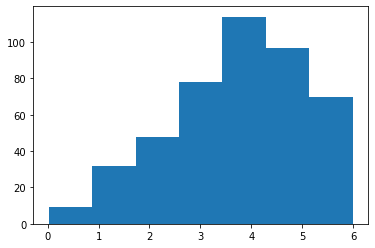

In [59]:
Part_2A = customer_arrivals()
plt.hist(Part_2A[0], bins= 7)

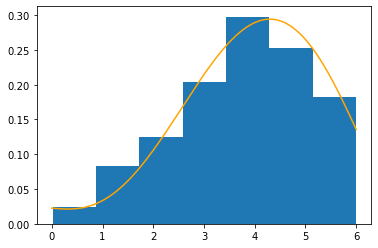

In [60]:
plt.hist(Part_2A[0], bins= 7,density = True)
intensity_func_scaled = (lams/integrate.quad(lam, 0,6)[0])
plt.plot(sims, intensity_func_scaled,'orange')

#### Part B:

In [61]:
def expect_lam(t):
    return ((t/60)**3+1)*((7.2-(t/60))**2)/300
expect_customers= integrate.quad(expect_lam, 0,360)[0]
print(expect_customers)

460.224


#### Part C:

In [62]:
variance = expect_customers
std_dev = math.sqrt(variance)
print(std_dev)

21.452831980883083


### Question #3

In [63]:
# to generate all the arrivals
def lam_function(x,y):
    return (1.25+math.sin(x))*(1.25+math.cos(y))

max_x_val = math.pi/2
max_y_val = 0
max_lam= lam_function(max_x_val, max_y_val)

minimum= -math.pi/2
maximum= 15*math.pi/2
num_points = np.random.poisson(max_lam*((maximum-minimum)**2))

def square():
    x_val = []
    y_val = []
    for i in range(num_points):n
        x= np.random.uniform(minimum,maximum)
        y= np.random.uniform(minimum,maximum)
        current_lam = lam_function(x,y)
        thin_U = np.random.uniform(0,1)
        if thin_U <= (current_lam/max_lam):
            x_val.append(x)
            y_val.append(y)
    return x_val,y_val

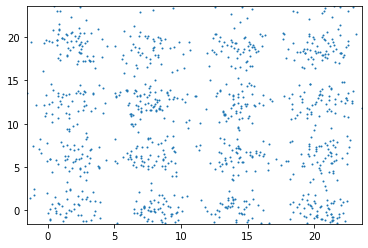

In [65]:
run = square()
plt.xlim(minimum,maximum)
plt.ylim(minimum,maximum)
plt.scatter(run[0], run[1], s=1)
plt.show()